In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta, datetime
from itertools import chain
import json
import os
import re

In [3]:
meta = pd.read_json("data/metadata.json", lines=True)
magazine = pd.read_json("data/magazine.json", lines=True)
user = pd.read_json("data/users.json", lines=True)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Metadata 

In [5]:
meta.shape

(643104, 9)

In [6]:
meta.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [7]:
len(meta['magazine_id'].unique())

28028

In [8]:
len(meta['user_id'].unique())

19065

In [9]:
len(meta['article_id'].unique())

4217

In [10]:
meta.loc[meta['magazine_id'] == 8982].sort_values("id").head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
283495,8982,@bookdb,세계 최강 기업의 뼈를 깎는 자기 혁신,"[도요타자동차, 도요타, 경영]",https://brunch.co.kr/@bookdb/1008,왜 다시 도요타인가,1480405541000,1008,@bookdb_1008
337959,8982,@bookdb,[환해장성] 죽지 않기 위한 제주인의 몸부림,"[제주바다, 제주올레, 제주도]",https://brunch.co.kr/@bookdb/1014,,1480556053000,1014,@bookdb_1014
569683,8982,@bookdb,아버지는 다들 어디로 떠났을까-<버려진 아들의 심리학>,"[니체, 아버지, 심리학]",https://brunch.co.kr/@bookdb/1020,,1480658615000,1020,@bookdb_1020
390947,8982,@bookdb,인사도 연습해야 는다,"[인사, 연습, 습관]",https://brunch.co.kr/@bookdb/1030,"말만 하는 부모, 상처 받는 아이",1480997028000,1030,@bookdb_1030
277752,8982,@bookdb,[올레] 열리면서도 닫힌 공간 건축의 백미,"[제주올레, 제주도, 도시개발]",https://brunch.co.kr/@bookdb/1037,제주는 그런 곳이 아니야,1481163453000,1037,@bookdb_1037


In [11]:
meta[['magazine_id', 'user_id']].drop_duplicates().head()

,magazine_id,user_id
0,8982,@bookdb
1,12081,@kohwang56
2,0,@hannahajink
3,16315,@bryceandjuli
4,29363,@mijeongpark


## Magazine

In [12]:
magazine.shape

(27967, 2)

In [13]:
magazine.head()

,magazine_tag_list,id
0,"[브런치북, 육아일기, 대화법, 들려주고픈이야기]",38842
1,"[tea, food]",11540
2,[food],11541
3,"[브런치북, 일상, 시, 사람]",11546
4,"[감성에세이, 노래, 음악에세이]",11544


In [14]:
magazine.loc[magazine['id'] == 8982].head()

,magazine_tag_list,id
16284,"[책, 독서, 독서에세이]",8982


## User

In [15]:
user.shape

(310758, 3)

In [16]:
user.head(2)

,keyword_list,following_list,id
0,[],"[@perytail, @brunch]",#901985d8bc4c481805c4a4f911814c4a
1,[],"[@holidaymemories, @wadiz, @sciforus, @dailydubu, @modernmother, @kokpain0323, @simplelife-1p, @junglechair, @englishspeaking, @dysonkim, @heyhaeun, @hotelscombined, @chloepark-11, @socialphysio, @dnqlcjstk123, @triple, @imagehwang, @barneconomy, @joohyoang, @turista, @leeeeesh, @travelpost, @soons, @volo, @lunasflo, @yurileehki9, @fibroidiary, @yjk9793, @betterplace, @dabansa, @bigcrown, @yoonjikwon, @wppmy, @yurigin, @syeonytable, @tennistory, @arimu, @zzanggusis, @theedit, @sumclean, @hsleey0yb, @houseggumiki, @ysstyle, @slist, @hotelscomkr, @kooocompany, @bisanggom, @fly-fish, @srsynn, @allstay, @honeytip, @sangwonsuh, @expediakr, @enerdoheezer, @skyscanner, @synam87, @wishbeen, @yulyul, @hyezine, @sustainlife, @banksalad, @vonovono77, @sangsang, @heywinkup, @missconcierge, @fromairplane, @astronomerboy, @creativejuwon, @seokkim21, @lovefashion, @the8work, @angk34, @lonelyplanet, @symriro, @brunch]",#1fd89e9dcfa64b45020d9eaca54e0eed


## Read files

In [17]:
read_file_lst = glob.glob("data/read/*")

In [18]:
exclude_file_lst = ['read.tar']

In [19]:
read_df_lst = []
for f in read_file_lst:
    file_name = os.path.basename(f)
    if file_name in exclude_file_lst:
        print(file_name)
    else:
        df_temp = pd.read_csv(f, header=None, names=['raw'])
        df_temp['dt'] = file_name[:8]
        df_temp['hr'] = file_name[8:10]
        df_temp['user_id'] = df_temp['raw'].str.split(' ').str[0]
        df_temp['article_id'] = df_temp['raw'].str.split(' ').str[1:].str.join(' ').str.strip()
        read_df_lst.append(df_temp)

In [21]:
read = pd.concat(read_df_lst)

In [22]:
read.head()

,raw,dt,hr,user_id,article_id
0,#a055d0c3520e1c002531001928217887 @charlessay_30 @wal8am_27 @uglyduckmin_40 @anti-essay_133 @roysday_125,20181121,14,#a055d0c3520e1c002531001928217887,@charlessay_30 @wal8am_27 @uglyduckmin_40 @anti-essay_133 @roysday_125
1,#a9cba8bf098c149170315d4cd8d3082e @jinbread_88 @jinbread_87 @jinbread_89,20181121,14,#a9cba8bf098c149170315d4cd8d3082e,@jinbread_88 @jinbread_87 @jinbread_89
2,#207c8cb590a843e247b9fe7fdd0e5281 @sangheeshyn_66,20181121,14,#207c8cb590a843e247b9fe7fdd0e5281,@sangheeshyn_66
3,#d76887a5b30adbf793f742c6f67b57bd @tenbody_1506 @tenbody_1506,20181121,14,#d76887a5b30adbf793f742c6f67b57bd,@tenbody_1506 @tenbody_1506
4,#b260d83247a4d9e3b22143c950f7f471 @maumdal_257 @maumdal_257,20181121,14,#b260d83247a4d9e3b22143c950f7f471,@maumdal_257 @maumdal_257


In [23]:
read.shape

(3507097, 5)

In [24]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

In [25]:
read_cnt_by_user = read['article_id'].str.split(' ').map(len)

In [26]:
read_cnt_by_user.head(2)

0    5
1    3
Name: article_id, dtype: int64

In [29]:
read['article_id'].str.split(' ').head(2)

0    [@charlessay_30, @wal8am_27, @uglyduckmin_40, @anti-essay_133, @roysday_125]
1                                      [@jinbread_88, @jinbread_87, @jinbread_89]
Name: article_id, dtype: object

In [30]:
read_raw = pd.DataFrame({'dt': np.repeat(read['dt'], read_cnt_by_user),
                         'hr': np.repeat(read['hr'], read_cnt_by_user),
                         'user_id': np.repeat(read['user_id'], read_cnt_by_user),
                         'article_id': chainer(read['article_id'])})

In [31]:
read_raw.shape

(22110706, 4)

In [32]:
read_raw.head()

,dt,hr,user_id,article_id
0,20181121,14,#a055d0c3520e1c002531001928217887,@charlessay_30
0,20181121,14,#a055d0c3520e1c002531001928217887,@wal8am_27
0,20181121,14,#a055d0c3520e1c002531001928217887,@uglyduckmin_40
0,20181121,14,#a055d0c3520e1c002531001928217887,@anti-essay_133
0,20181121,14,#a055d0c3520e1c002531001928217887,@roysday_125


# EDA

## metadata 전처리

In [60]:
atc = meta.copy()

In [61]:
atc['reg_datetime'] = atc['reg_ts'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
# atc.loc[atc['reg_datetime'] == atc['reg_datetime'].min(), 'reg_datetime'] = datetime(2090, 12, 31)

In [62]:
sorted(atc['reg_datetime'].unique())

[numpy.datetime64('1970-01-01T09:00:00.000000000'),
 numpy.datetime64('2015-05-06T14:45:08.000000000'),
 numpy.datetime64('2015-05-07T12:04:22.000000000'),
 numpy.datetime64('2015-05-07T21:59:48.000000000'),
 numpy.datetime64('2015-05-07T22:04:54.000000000'),
 numpy.datetime64('2015-05-07T22:18:21.000000000'),
 numpy.datetime64('2015-05-08T16:10:32.000000000'),
 numpy.datetime64('2015-05-08T19:36:40.000000000'),
 numpy.datetime64('2015-05-08T19:37:08.000000000'),
 numpy.datetime64('2015-05-08T19:37:20.000000000'),
 numpy.datetime64('2015-05-08T19:37:34.000000000'),
 numpy.datetime64('2015-05-08T19:41:16.000000000'),
 numpy.datetime64('2015-05-08T19:42:09.000000000'),
 numpy.datetime64('2015-05-10T15:17:41.000000000'),
 numpy.datetime64('2015-05-11T09:05:03.000000000'),
 numpy.datetime64('2015-05-11T10:49:23.000000000'),
 numpy.datetime64('2015-05-11T17:26:21.000000000'),
 numpy.datetime64('2015-05-11T19:01:00.000000000'),
 numpy.datetime64('2015-05-11T19:29:05.000000000'),
 numpy.datet

In [63]:
atc.loc[atc['reg_datetime'] == atc['reg_datetime'].min(), 'reg_datetime'] = datetime(2090, 12, 31)

In [64]:
atc['reg_dt'] = atc['reg_datetime'].dt.date

In [65]:
atc['type'] = atc['magazine_id'].apply(lambda x: '개인' if x == 0.0 else '매거진')

In [66]:
atc.head(2)

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id,reg_datetime,reg_dt,type
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782,2016-09-27 11:47:07,2016-09-27,매거진
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81,2016-05-13 07:39:09,2016-05-13,매거진


In [67]:
atc.columns

Index(['magazine_id', 'user_id', 'title', 'keyword_list', 'display_url',
       'sub_title', 'reg_ts', 'article_id', 'id', 'reg_datetime', 'reg_dt',
       'type'],
      dtype='object')

In [85]:
atc.columns = ['magazine_id', 'author_id', 'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id', 'article_id', 'reg_datetime', 'reg_dt', 'type']

In [86]:
atc.head()

,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,article_id,reg_datetime,reg_dt,type
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782,2016-09-27 11:47:07,2016-09-27,매거진
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81,2016-05-13 07:39:09,2016-05-13,매거진
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4,2015-11-20 14:28:07,2015-11-20,개인
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88,2017-04-01 22:59:21,2017-04-01,매거진
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34,2018-04-10 01:55:42,2018-04-10,매거진


## 등록일자별 글 수

In [70]:
atc_cnt_by_reg_dt = atc.groupby('reg_dt', as_index=False)['article_id'].count()

Text(0, 0.5, 'Article count')

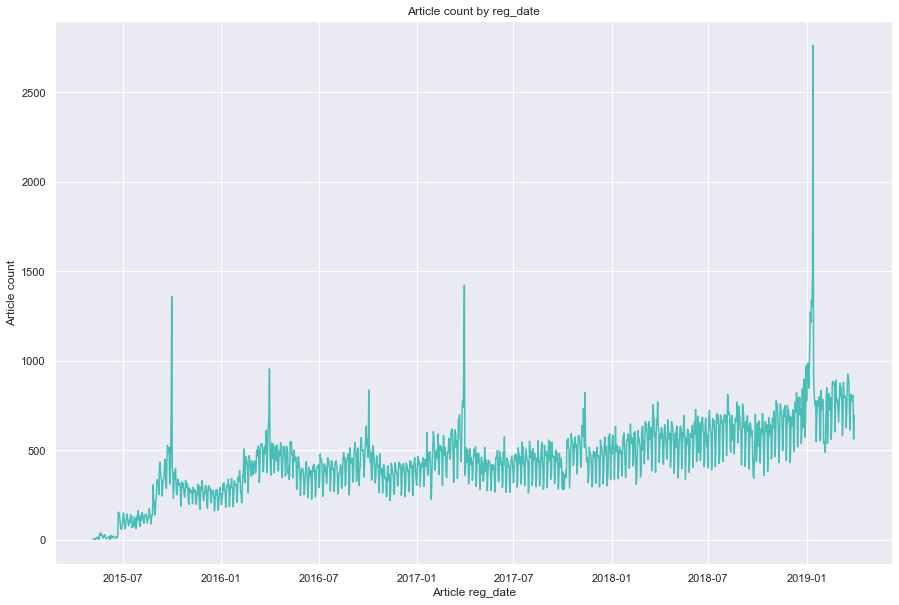

In [75]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.lineplot(data=atc_cnt_by_reg_dt[:-1], x='reg_dt', y='article_id', color='#49beb7')

plt.title('Article count by reg_date')
plt.xlabel('Article reg_date')
plt.ylabel('Article count')

## 2. 글 소비

### a. 글별 소비수 통계

In [76]:
atc_read_cnt = read_raw[read_raw.article_id != ''].groupby('article_id')['user_id'].count()

In [77]:
atc_read_cnt.describe()

count    505840.000000
mean         43.700988
std         302.292764
min           1.000000
25%           3.000000
50%           8.000000
75%          25.000000
max       97206.000000
Name: user_id, dtype: float64

In [78]:
atc_read_cnt.quantile([0.85, 0.95])

0.85     47.0
0.95    141.0
Name: user_id, dtype: float64

In [79]:
atc_read_cnt = atc_read_cnt.reset_index()
atc_read_cnt.columns = ['article_id', 'read_cnt']

In [81]:
atc_read_cnt.head()

,article_id,read_cnt
0,#00700c454af49d5c9a36a13fcba01d0a_1,112
1,#00700c454af49d5c9a36a13fcba01d0a_10,24
2,#00700c454af49d5c9a36a13fcba01d0a_100,37
3,#00700c454af49d5c9a36a13fcba01d0a_101,32
4,#00700c454af49d5c9a36a13fcba01d0a_102,40


In [83]:
atc.head(2)

,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id,reg_datetime,reg_dt,type
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782,2016-09-27 11:47:07,2016-09-27,매거진
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81,2016-05-13 07:39:09,2016-05-13,매거진


In [84]:
atc_read_cnt.head(2)

,article_id,read_cnt
0,#00700c454af49d5c9a36a13fcba01d0a_1,112
1,#00700c454af49d5c9a36a13fcba01d0a_10,24


In [87]:
atc_read_cnt = pd.merge(atc_read_cnt, atc, how='left', left_on='article_id', right_on='article_id')

In [88]:
atc_read_cnt.shape

(505840, 13)

In [90]:
atc_read_cnt.tail(2)

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type
505838,@zzzaam_9,43,0.0,@zzzaam,디자인팀에 작가가 필요한 이유,"[UX, 작가, 글쓰기]",https://brunch.co.kr/@zzzaam/9,Writers + Designers = A match made in he,1.496501e+12,9.0,2017-06-03 23:39:22,2017-06-03,개인
505839,@zzzwhite_4,2,0.0,@zzzwhite,너는 희망이다.,"[감성그림, 희망, 엄마]",https://brunch.co.kr/@zzzwhite/4,감성드로잉,1.467290e+12,4.0,2016-06-30 21:30:54,2016-06-30,개인


In [91]:
atc_read_cnt_nn = atc_read_cnt[atc_read_cnt['id'].notnull()]

In [92]:
atc_read_cnt_nn['read_cnt'].describe()

count    476147.000000
mean         43.904592
std         304.873256
min           1.000000
25%           3.000000
50%           8.000000
75%          25.000000
max       97206.000000
Name: read_cnt, dtype: float64

In [93]:
atc_read_cnt_nn['read_cnt'].quantile([0.90, 0.95])

0.90     72.0
0.95    142.0
Name: read_cnt, dtype: float64

In [94]:
def get_class(x):
    if x >= 142:
        result = '5%'
    elif x >= 72:
        result = '10%'
    elif x >= 25:
        result = '25%'
    elif x >= 8:
        result = '50%'
    elif x >= 3:
        result = '75%'
    else:
        result = '100%'
    return result

In [95]:
atc_read_cnt_nn['class'] = atc_read_cnt_nn['read_cnt'].map(get_class)

<ipython-input-95-113429417f8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atc_read_cnt_nn['class'] = atc_read_cnt_nn['read_cnt'].map(get_class)


In [96]:
atc_read_cnt_nn.head()

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type,class
5417,@002_10,2,0.0,@002,'80% 안심계란' 포기하게 한 20% 살충제 계란,"[계란, 살충제, 피해]",https://brunch.co.kr/@002/10,정직한 농가에 대한 피해보상은 소비자 신뢰를 돌려주는 것,1.504448e+12,10.0,2017-09-03 23:12:35,2017-09-03,개인,100%
5418,@002_2,6,0.0,@002,청년들은 '왜' 농촌으로 갔을까?,"[귀촌, 농촌, 청년농업인]",https://brunch.co.kr/@002/2,삶의 가치를 찾아 유랑하는 청년들의 'YOLO 라이프',1.501030e+12,2.0,2017-07-26 09:46:45,2017-07-26,개인,75%
5419,@002jesus_1,10,0.0,@002jesus,우리는 왜 가난해야 하나요?,"[후원, 기부, 비영리]",https://brunch.co.kr/@002jesus/1,비영리를 바라보는 편견들 (1),1.549456e+12,1.0,2019-02-06 21:18:49,2019-02-06,개인,50%
5420,@002paper_2,3,0.0,@002paper,할수 있는 것과 하고 싶은 것,"[제주, 서울생활, 서울]",https://brunch.co.kr/@002paper/2,현실과 꿈의 거리..,1.470905e+12,2.0,2016-08-11 17:49:42,2016-08-11,개인,75%
5421,@002paper_3,2,0.0,@002paper,긍정적으로 생각하며 주문을 걸기..,"[바램, 일상에세이, 긍정]",https://brunch.co.kr/@002paper/3,된다. 된다. 될거다....,1.470913e+12,3.0,2016-08-11 19:58:52,2016-08-11,개인,100%


### b.등록일자별 글 소비수

Text(0, 0.5, '글 소비수')

/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matp

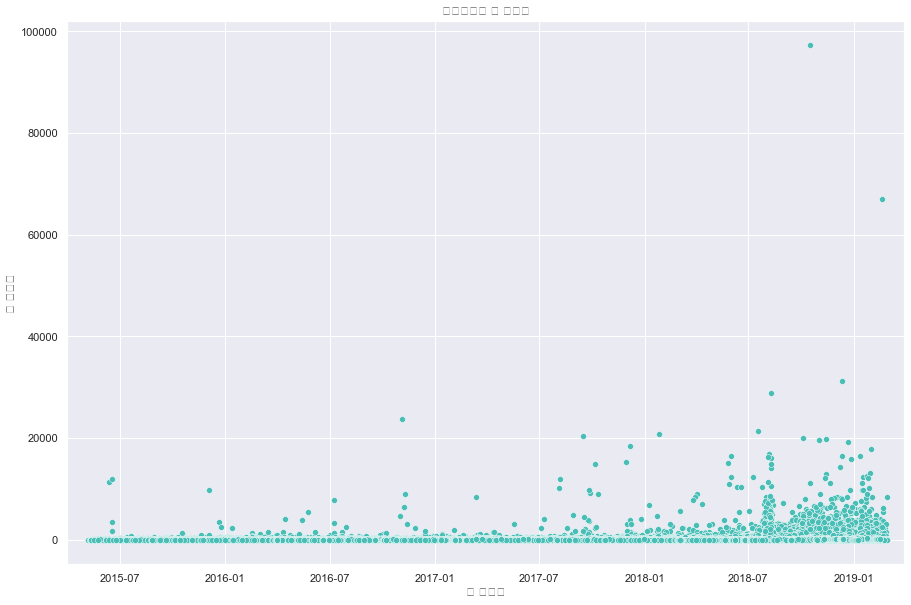

In [97]:
lm = sns.scatterplot(data=atc_read_cnt_nn, x='reg_dt', y='read_cnt', color='#49beb7')
lm.set(xlim=(datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2019, 3, 30))))

plt.title('등록일자별 글 소비수')
plt.xlabel('글 등록일')
plt.ylabel('글 소비수')

In [98]:
atc_read_cnt_nn.sort_values(by='read_cnt', ascending=False).head(2)

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type,class
63061,@brunch_141,97206,0.0,@brunch,브런치 작가가 함께 빨강머리 앤을 그리고 쓰다.,"[브런치X빨강머리앤, 빨강머리앤, 출판, 작가]",https://brunch.co.kr/@brunch/141,글·그림 작가 파트너 프로젝트,1.539742e+12,141.0,2018-10-17 11:11:22,2018-10-17,개인,5%
63070,@brunch_151,66903,0.0,@brunch,"브런치 무비 패스, 영화의 진한 여운을 나누세요","[브런치, 시사회, 브런치무비패스]",https://brunch.co.kr/@brunch/151,브런치 무비 패스 5기 작가 모집,1.550466e+12,151.0,2019-02-18 14:00:34,2019-02-18,개인,5%


Text(0, 0.5, '글 소비수')

/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matp

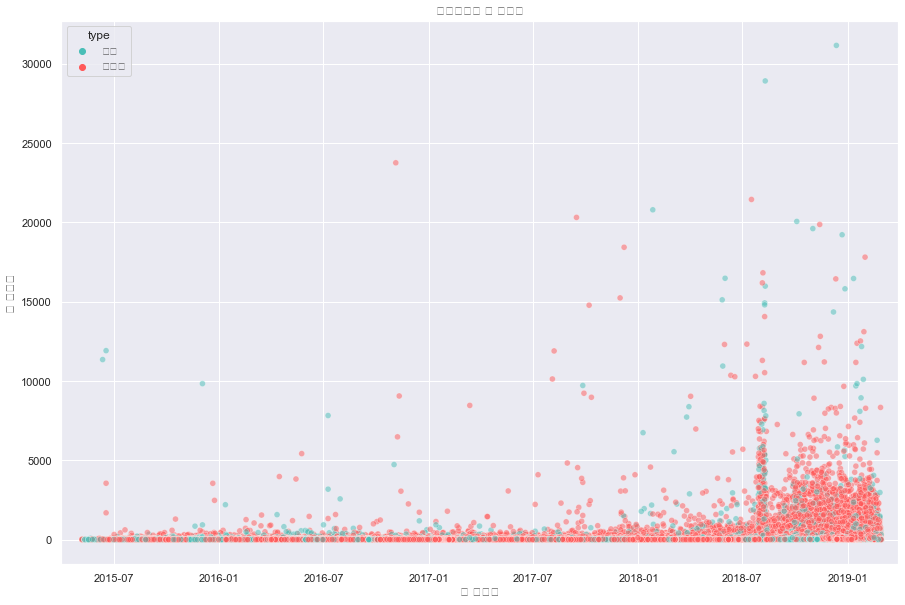

In [99]:
# 특이값 2개 데이터를 제외
lm = sns.scatterplot(data=atc_read_cnt_nn[~atc_read_cnt_nn.article_id.isin(['@brunch_141', '@brunch_151'])], x='reg_dt', y='read_cnt', hue='type', alpha=0.5, palette=['#49beb7', '#ff5959'])
lm.set(xlim=(datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2019, 3, 30))))
plt.title('등록일자별 글 소비수')
plt.xlabel('글 등록일')
plt.ylabel('글 소비수')

# 3. 경과일에 따른 글 소비 변화

## a. 데이터 전처리

In [100]:
off_data = pd.merge(read_raw, atc, how='inner', left_on='article_id', right_on='article_id')

In [101]:
off_data.shape

(20905040, 15)

In [102]:
off_data.head(2)

,dt,hr,user_id,article_id,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type
0,20181121,14,#a055d0c3520e1c002531001928217887,@charlessay_30,37242,@charlessay,프랑스 인큐베이팅 프로그램 킥오프(2),"[IT, 스타트업]",https://brunch.co.kr/@charlessay/30,자신의 비전을 이루기 위해 여행을 떠나는 길동무들,1542529515000,30,2018-11-18 17:25:15,2018-11-18,매거진
1,20181118,18,#585b5346c56d6d0ed6341afe382e03b7,@charlessay_30,37242,@charlessay,프랑스 인큐베이팅 프로그램 킥오프(2),"[IT, 스타트업]",https://brunch.co.kr/@charlessay/30,자신의 비전을 이루기 위해 여행을 떠나는 길동무들,1542529515000,30,2018-11-18 17:25:15,2018-11-18,매거진


In [104]:
off_data.columns

Index(['dt', 'hr', 'user_id', 'article_id', 'magazine_id', 'author_id',
       'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id',
       'reg_datetime', 'reg_dt', 'type'],
      dtype='object')

In [105]:
off_data.columns = ['read_dt', 'hr', 'user_id', 'article_id', 'magazine_id', 'author_id',
       'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id',
       'reg_datetime', 'reg_dt', 'type']

In [106]:
off_data = off_data[['read_dt', 'user_id', 'article_id', 'title', 'sub_title', 'author_id', 'reg_dt', 'type', 'display_url', 'keyword_list', 'magazine_id']]

In [108]:
off_data['read_dt'] = pd.to_datetime(off_data['read_dt'], format='%Y%m%d')
off_data['reg_dt'] = pd.to_datetime(off_data['reg_dt'], format='%Y-%m-%d')
off_data['off_day'] = (off_data['read_dt'] - off_data['reg_dt']).dt.days

<ipython-input-108-85bdc6cd829f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_data['read_dt'] = pd.to_datetime(off_data['read_dt'], format='%Y%m%d')
<ipython-input-108-85bdc6cd829f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_data['reg_dt'] = pd.to_datetime(off_data['reg_dt'], format='%Y-%m-%d')
<ipython-input-108-85bdc6cd829f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [109]:
# meatadata와 join
off_data = pd.merge(off_data, atc_read_cnt_nn[['article_id', 'read_cnt', 'class']], how='left', left_on='article_id', right_on='article_id')

In [110]:
off_data_agg = off_data.groupby(['article_id', 'off_day', 'read_dt', 'reg_dt', 'title', 'author_id', 'type', 'display_url', 'magazine_id', 'class'], as_index=False)['user_id'].count()

In [111]:
# 등록일자가 missing된 로그들
off_data_agg[off_data_agg.off_day < 0].head()

,article_id,off_day,read_dt,reg_dt,title,author_id,type,display_url,magazine_id,class,user_id
166,@01023920600_18,-26324,2018-12-05,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,2
167,@01023920600_18,-26303,2018-12-26,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,2
168,@01023920600_18,-26280,2019-01-18,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,1
172,@01023920600_2,-26324,2018-12-05,2090-12-31,효자되는 소액투자 돈불리는 소액투자,@01023920600,개인,https://brunch.co.kr/@01023920600/2,0,75%,2
173,@01023920600_2,-26303,2018-12-26,2090-12-31,효자되는 소액투자 돈불리는 소액투자,@01023920600,개인,https://brunch.co.kr/@01023920600/2,0,75%,2


## b. 경과일에 따른 글 소비 변화

In [112]:
# 경과일자별 소비수 총합
off_day_sum = off_data_agg[(off_data_agg['reg_dt'] >= datetime(2018, 10, 1)) & (off_data_agg.off_day >= 0)].groupby('off_day')['user_id'].sum()

In [113]:
# 경과일자에 등록되어있는 아티클 수
reg_dt_cnt = off_data_agg[(off_data_agg['reg_dt'] >= datetime(2018, 10, 1)) & (off_data_agg.off_day >= 0)].groupby('reg_dt')['article_id'].nunique()

In [114]:
off_day_avg = pd.concat([off_day_sum, reg_dt_cnt.cumsum().sort_index(ascending=False).reset_index()], axis=1)

In [115]:
off_day_avg['off_avg'] = off_day_avg['user_id'] / off_day_avg['article_id']

In [116]:
off_day_avg['percentile'] = off_day_avg['off_avg'] / off_day_avg['off_avg'].sum()

In [117]:
off_day_avg['cum_per'] = off_day_avg['percentile'].cumsum()

In [118]:
off_day_avg.head(10)

,user_id,reg_dt,article_id,off_avg,percentile,cum_per
0,3142049,2019-02-28,107356,29.267568,0.207084,0.207084
1,1726882,2019-02-27,106649,16.192201,0.114569,0.321653
2,1017862,2019-02-26,105891,9.612356,0.068013,0.389665
3,776093,2019-02-25,105156,7.380397,0.052220,0.441886
4,632960,2019-02-24,104308,6.068183,0.042936,0.484821
5,529081,2019-02-23,103611,5.106417,0.036131,0.520952
6,436611,2019-02-22,103019,4.238160,0.029987,0.550939
7,412530,2019-02-21,102167,4.037801,0.028570,0.579509
8,236772,2019-02-20,101343,2.336343,0.016531,0.596040
9,193039,2019-02-19,100511,1.920576,0.013589,0.609629


Text(0, 0.5, '평균 글 소비수')

/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taerim/opt/anaconda3/lib/python3.8/site-packages/matp

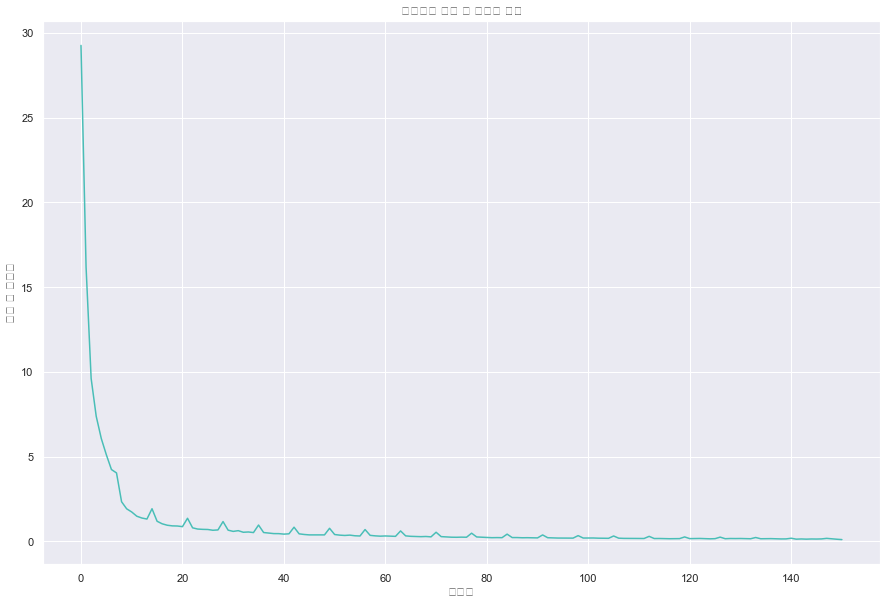

In [119]:
sns.lineplot(data=off_day_avg, x=off_day_avg.index, y='off_avg', color='#49beb7')
plt.title('경과일에 따른 글 소비수 변화')
plt.xlabel('경과일')
plt.ylabel('평균 글 소비수')

## 4. 유저

In [120]:
# 유져별 방문일수, 글 소비수
grp_by_user = off_data.groupby('user_id').agg({'read_dt':['nunique', 'count']})

In [121]:
grp_by_user = grp_by_user.reset_index()
grp_by_user.columns = ['user_id', 'visit_day_cnt', 'read_cnt']

In [122]:
grp_by_user.head()

,user_id,visit_day_cnt,read_cnt
0,#00001ba6ca8d87d2fc34d626ba9cfe6f,1,3
1,#0000e87158c1426d6ffb72cebac6cb64,1,2
2,#0000eea6d339abfd02ed590bc451fc63,1,1
3,#0000fdba8f35c76eacab74c5c6bc7f1a,3,11
4,#000127ad0f1981cae1292efdb228f0e9,1,27


### a. 방문일 수 기준 유저 통계

In [123]:
grp_by_user['visit_day_cnt'].value_counts(normalize=True).head()

1    0.352137
2    0.142516
3    0.088841
4    0.063050
5    0.047217
Name: visit_day_cnt, dtype: float64

In [124]:
grp_by_user['visit_day_cnt'].value_counts(normalize=True).sort_index()[74:].sum()

0.009034902176890052

In [125]:
low_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] <=2, 'user_id']

In [126]:
upp_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] >=75, 'user_id']

In [127]:
low_visit_user.shape, upp_visit_user.shape

((149903,), (2738,))

In [128]:
off_data_l = off_data[off_data.user_id.isin(low_visit_user)]
off_data_u = off_data[off_data.user_id.isin(upp_visit_user)]

In [129]:
off_data.shape, off_data_l.shape, off_data_u.shape

((20905040, 14), (1083925, 14), (5002114, 14))

In [130]:
1083925/20905040, 5002114/20905040

(0.051849936665990595, 0.23927789662205862)

In [131]:
off_data_l.groupby('user_id')['article_id'].count().mean(), off_data_l.groupby('user_id')['article_id'].count().std(),

(7.230842611555473, 13.573547204837958)

In [132]:
off_data_u.groupby('user_id')['article_id'].count().mean(), off_data_u.groupby('user_id')['article_id'].count().std()

(1826.9225712198686, 2758.1071094196964)

### 3. 신규/단골 그룹 내 인기 글

In [133]:
off_data_l_rk = off_data_l.groupby(['article_id', 'title', 'reg_dt'])['user_id'].count().sort_values(ascending=False)
off_data_l_rk = off_data_l_rk.reset_index()
off_data_l_rk['rk'] = off_data_l_rk.index + 1

In [134]:
off_data_u_rk = off_data_u.groupby(['article_id', 'title', 'reg_dt'])['user_id'].count().sort_values(ascending=False)
off_data_u_rk = off_data_u_rk.reset_index()
off_data_u_rk['rk'] = off_data_u_rk.index + 1

In [135]:
off_data_u_rk = off_data_u.groupby(['article_id', 'title', 'reg_dt'])['user_id'].count().sort_values(ascending=False)
off_data_u_rk = off_data_u_rk.reset_index()
off_data_u_rk['rk'] = off_data_u_rk.index + 1

In [136]:
# 단골 독자 소비수 상위 상위 10개 글
off_data_u_rk.head(10)

,article_id,title,reg_dt,user_id,rk
0,@brunch_141,브런치 작가가 함께 빨강머리 앤을 그리고 쓰다.,2018-10-17,11636,1
1,@brunch_151,"브런치 무비 패스, 영화의 진한 여운을 나누세요",2019-02-18,6010,2
2,@brunch_145,"10인의 에디터와 함께 하는, 브런치북 프로젝트 #6",2018-12-12,4379,3
3,@tenbody_1305,러닝머신보다 효과 좋은 체지방 빼는 맨몸 운동 5가지,2018-08-10,3674,4
4,@hyehyodam_19,나쁜년이 잘 사는 이유...,2018-01-26,2920,5
5,@sangheeshyn_66,살찌지 않는 여자들,2018-11-13,2866,6
6,@brunch_142,[예고] 브런치북 프로젝트 #6,2018-11-01,2753,7
7,@intlovesong_28,아끼면 똥 되는 것 4가지,2016-11-04,2606,8
8,@x-xv_19,"승무원, 들어오려는 자, 나가려는 자",2018-08-05,2603,9
9,@steven_179,친구 없는 사람의 3가지 특징,2017-09-15,2597,10


In [137]:
off_data_lu_rk = pd.merge(off_data_l_rk, off_data_u_rk, how='outer', left_on = 'article_id', right_on='article_id')

In [138]:
off_data_lu_rk['diff_rk'] = off_data_lu_rk['rk_x'] - off_data_lu_rk['rk_y']

In [139]:
# 신규 독자 소비수 상위 50개 글 중 단골 독자의 순위 차가 많이 나는 글
off_data_lu_rk[off_data_lu_rk.rk_x <= 50].sort_values(by='diff_rk', ascending=True).head(10)

,article_id,title_x,reg_dt_x,user_id_x,rk_x,title_y,reg_dt_y,user_id_y,rk_y,diff_rk
7,@kakaomobility_20,음성으로 편리하게,2018-10-17,2458.0,8.0,음성으로 편리하게,2018-10-17,14.0,64179.0,-64171.0
4,@brunch_2,브런치 작가 신청 안내,2015-06-18,4068.0,5.0,브런치 작가 신청 안내,2015-06-18,232.0,3216.0,-3211.0
33,@brunch_139,작가님에게 새로운 제안이 도착했습니다,2018-08-08,1047.0,34.0,작가님에게 새로운 제안이 도착했습니다,2018-08-08,474.0,750.0,-716.0
18,@brunch_152,작가 인터뷰 - 임희정 아나운서의 고백,2019-02-27,1611.0,19.0,작가 인터뷰 - 임희정 아나운서의 고백,2019-02-27,480.0,730.0,-711.0
2,@brunch_1,"글이 작품이 되는 공간, 브런치",2015-06-12,5282.0,3.0,"글이 작품이 되는 공간, 브런치",2015-06-12,528.0,569.0,-566.0
26,@brunch_111,브런치 책방에 작가님의 책을 입고해주세요,2017-09-28,1326.0,27.0,브런치 책방에 작가님의 책을 입고해주세요,2017-09-28,702.0,315.0,-288.0
35,@jmg5308_163,이효리를 통해 바라본 자존감 높은 사람의 특징,2017-08-04,995.0,36.0,이효리를 통해 바라본 자존감 높은 사람의 특징,2017-08-04,795.0,233.0,-197.0
38,@dong02_1372,자존감을 높이는 언어습관 3가지 방법,2017-10-11,876.0,39.0,자존감을 높이는 언어습관 3가지 방법,2017-10-11,880.0,185.0,-146.0
31,@nplusu_49,벨기에의 3가지 보물,2016-11-10,1170.0,32.0,벨기에의 3가지 보물,2016-11-10,900.0,175.0,-143.0
45,@needleworm_1,크롤러를 이용해 우체국 등기우편을 자동으로 정리해 보자,2018-11-01,796.0,46.0,크롤러를 이용해 우체국 등기우편을 자동으로 정리해 보자,2018-11-01,905.0,173.0,-127.0


In [140]:
# 단골 독자 소비수 상위 50개 글 중 신규 독자의 순위 차가 많이 나는 긂
off_data_lu_rk[off_data_lu_rk.rk_y <= 50].sort_valueㅠㅠㅠs(by='diff_rk', ascending=False).head(10)

,article_id,title_x,reg_dt_x,user_id_x,rk_x,title_y,reg_dt_y,user_id_y,rk_y,diff_rk
753,@doyeonsunim_240,자기 관리의 시작,2018-08-06,117.0,754.0,자기 관리의 시작,2018-08-06,1608.0,37.0,717.0
504,@boboc_72,"여름, 수박을 먹는 계절",2018-08-12,151.0,505.0,"여름, 수박을 먹는 계절",2018-08-12,1473.0,49.0,456.0
434,@kam_33,많이 먹은 다음날 반드시 지켜야 할 3가지 습관,2018-08-09,167.0,435.0,많이 먹은 다음날 반드시 지켜야 할 3가지 습관,2018-08-09,1751.0,29.0,406.0
261,@jooyoon_51,구질구질한 연애,2018-08-01,227.0,262.0,구질구질한 연애,2018-08-01,1750.0,30.0,232.0
211,@greenut90_85,크림라떼와 브라우니,2018-08-05,257.0,212.0,크림라떼와 브라우니,2018-08-05,1573.0,41.0,171.0
199,@roysday_279,혼자서 어찌어찌 하다보니 1억을 넘겼다.,2018-11-03,266.0,200.0,혼자서 어찌어찌 하다보니 1억을 넘겼다.,2018-11-03,1659.0,36.0,164.0
162,@honeytip_940,뱃살 쏙 들어가게 하는 건강한 먹거리 6가지,2018-08-09,305.0,163.0,뱃살 쏙 들어가게 하는 건강한 먹거리 6가지,2018-08-09,2408.0,12.0,151.0
136,@tenbody_1297,매일 5분씩 참으면서 살 빼고 근육 늘리는 방법,2018-08-09,346.0,137.0,매일 5분씩 참으면서 살 빼고 근육 늘리는 방법,2018-08-09,2244.0,15.0,122.0
149,@merryseo_73,행복한가요? 얼마나 벌어요? 불안하진 않나요?,2018-11-22,318.0,150.0,행복한가요? 얼마나 벌어요? 불안하진 않나요?,2018-11-22,1742.0,31.0,119.0
115,@honeytip_945,물에 오이를 넣어 마시면 생기는 몸의 변화 5가지,2018-08-10,392.0,116.0,물에 오이를 넣어 마시면 생기는 몸의 변화 5가지,2018-08-10,2227.0,16.0,100.0


## 5. Following list

### Following list 통계

In [142]:
# following_list가 있는 유저
following = user[user['following_list'].str.len() !=0 ]

In [145]:
# 98%의 유저가 follow하는 작가가 있음

following.shape[0] / user.shape[0]

0.9766120260781701

In [147]:
following['author_cnt'] = user['following_list'].str.len()

<ipython-input-147-61612d5d8f94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  following['author_cnt'] = user['following_list'].str.len()


In [148]:
#평균 구독자수 
following['author_cnt'].mean()

8.622620185179084

In [150]:
following['following_list'] = following['following_list'].apply(lambda x: ' '.join(x))

<ipython-input-150-13f4f9656b8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  following['following_list'] = following['following_list'].apply(lambda x: ' '.join(x))


In [151]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

In [152]:
following_lens = following['following_list'].str.split(' ').map(len)

In [153]:
following_raw = pd.DataFrame({'id': np.repeat(following['id'], following_lens),
                         'following_list': chainer(following['following_list'])})

In [154]:
# 가장 구독하는 유저가 많은 작가 리스트
following_raw['following_list'].value_counts(ascending=False)[:20]

@brunch         292413
@dryjshin         9011
@tenbody          8615
@roysday          8500
@yumileewyky      6116
@varo             5688
@yoonash          5653
@imagineer        5483
@lunarshore       5414
@ebprux           5374
@haneulalice      5341
@suhanjang        4911
@daljasee         4756
@mobiinside       4743
@sustainlife      4655
@bang1999         4577
@seochogirl       4441
@annejeong        4426
@eastgo           4387
@hyejinchoi       4305
Name: following_list, dtype: int64

In [155]:
following_read = pd.merge(off_data, following_raw, how='inner', left_on=['user_id', 'author_id'], right_on=['id', 'following_list'])

In [156]:
following_read.shape[0] / off_data.shape[0]

0.3485478621423351